In [276]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg
from wordcloud import WordCloud

In [277]:
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords

In [278]:
df = pd.read_csv('Connections.csv', skiprows = 3)
df['Connected Year'] = pd.to_datetime(df['Connected On']).dt.year
df['Connected Month'] = pd.to_datetime(df['Connected On']).dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   First Name       4159 non-null   object
 1   Last Name        4159 non-null   object
 2   URL              4159 non-null   object
 3   Email Address    59 non-null     object
 4   Company          4098 non-null   object
 5   Position         4099 non-null   object
 6   Connected On     4228 non-null   object
 7   Connected Year   4228 non-null   int32 
 8   Connected Month  4228 non-null   int32 
dtypes: int32(2), object(7)
memory usage: 264.4+ KB


Interactive data exploration with pygwalker library

In [279]:
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-000621512fa59a89mhUPDzfegav6r3OV" style="height: auto">\n    <hea…

### Top 15 Job titles of connections made in 2016-2018, 2024, and across all years

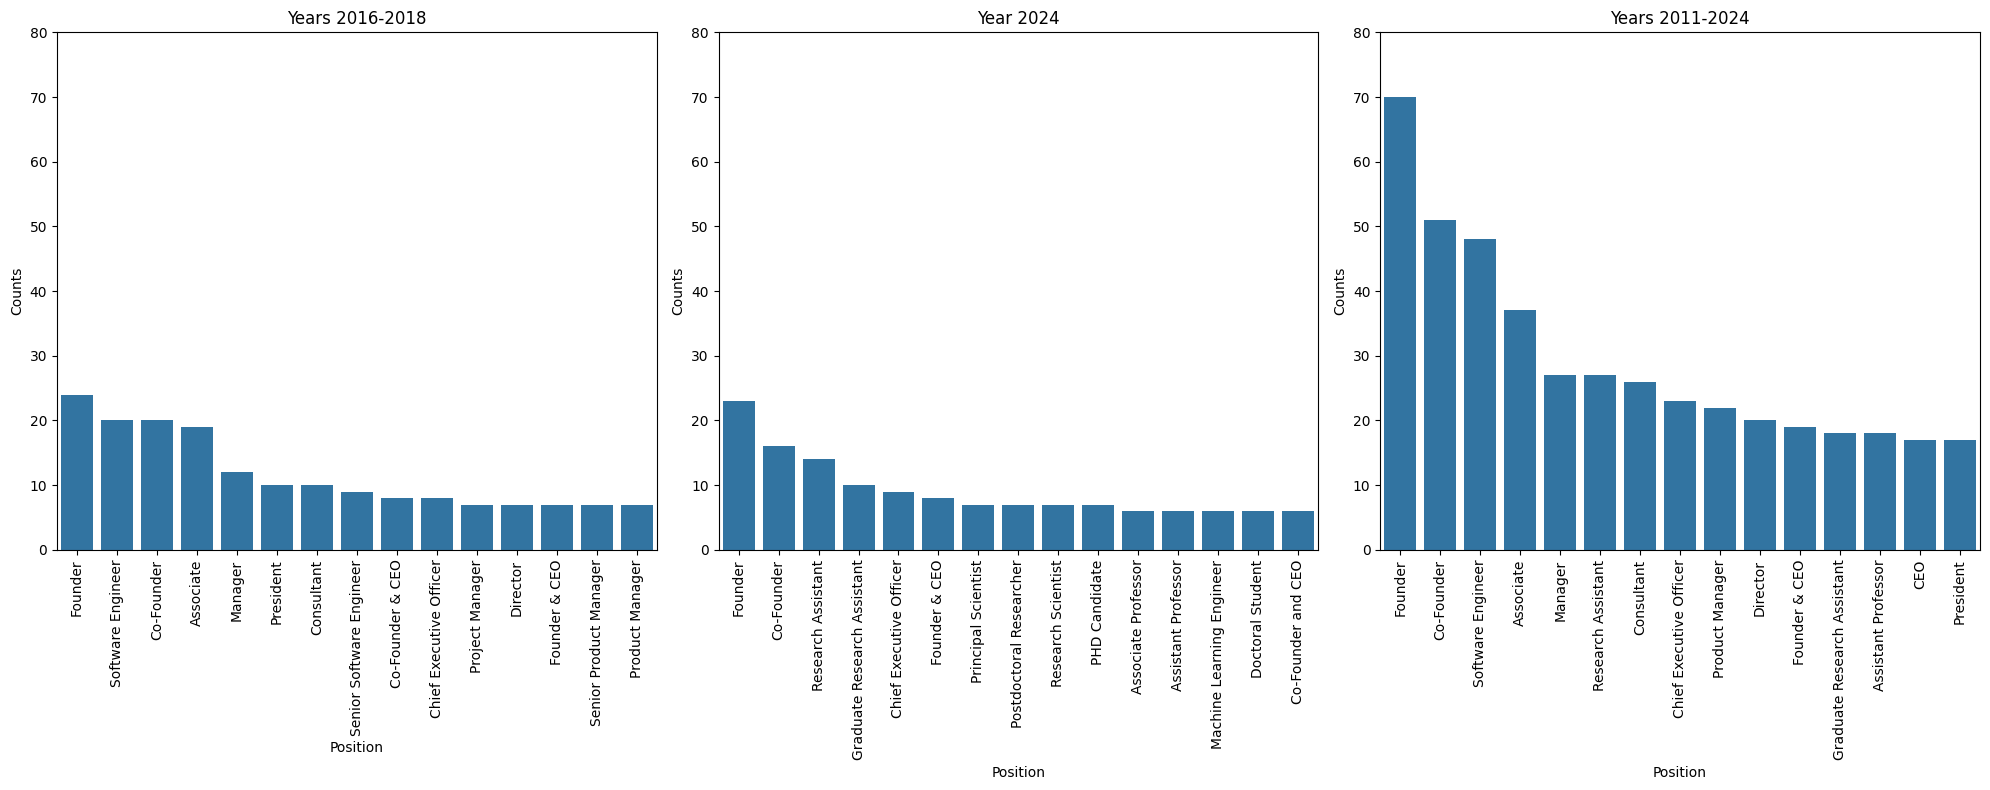

In [280]:
# Filter and get the top 15 positions for each plot
transition1 = df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Position'].value_counts().head(15)
transition2 = df.loc[df['Connected Year'].isin([2023, 2024])]['Position'].value_counts().head(15)
all_years = df['Position'].value_counts().head(15)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1
sns.barplot(x=transition1.index, y=transition1.values, ax=axs[0])
axs[0].set_title('Years 2016-2018')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Counts')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim([0, 80])
# Plot 2
sns.barplot(x=transition2.index, y=transition2.values, ax=axs[1])
axs[1].set_title('Year 2024')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Counts')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim([0, 80])
# Plot 3
sns.barplot(x=all_years.index, y=all_years.values, ax=axs[2])
axs[2].set_title('Years 2011-2024')
axs[2].set_xlabel('Position')
axs[2].set_ylabel('Counts')
axs[2].tick_params(axis='x', rotation=90)
axs[2].set_ylim([0, 80])

plt.tight_layout()
plt.show()

### Top 15 Companies connected with across Years 2016-2018, 2024, and across all years

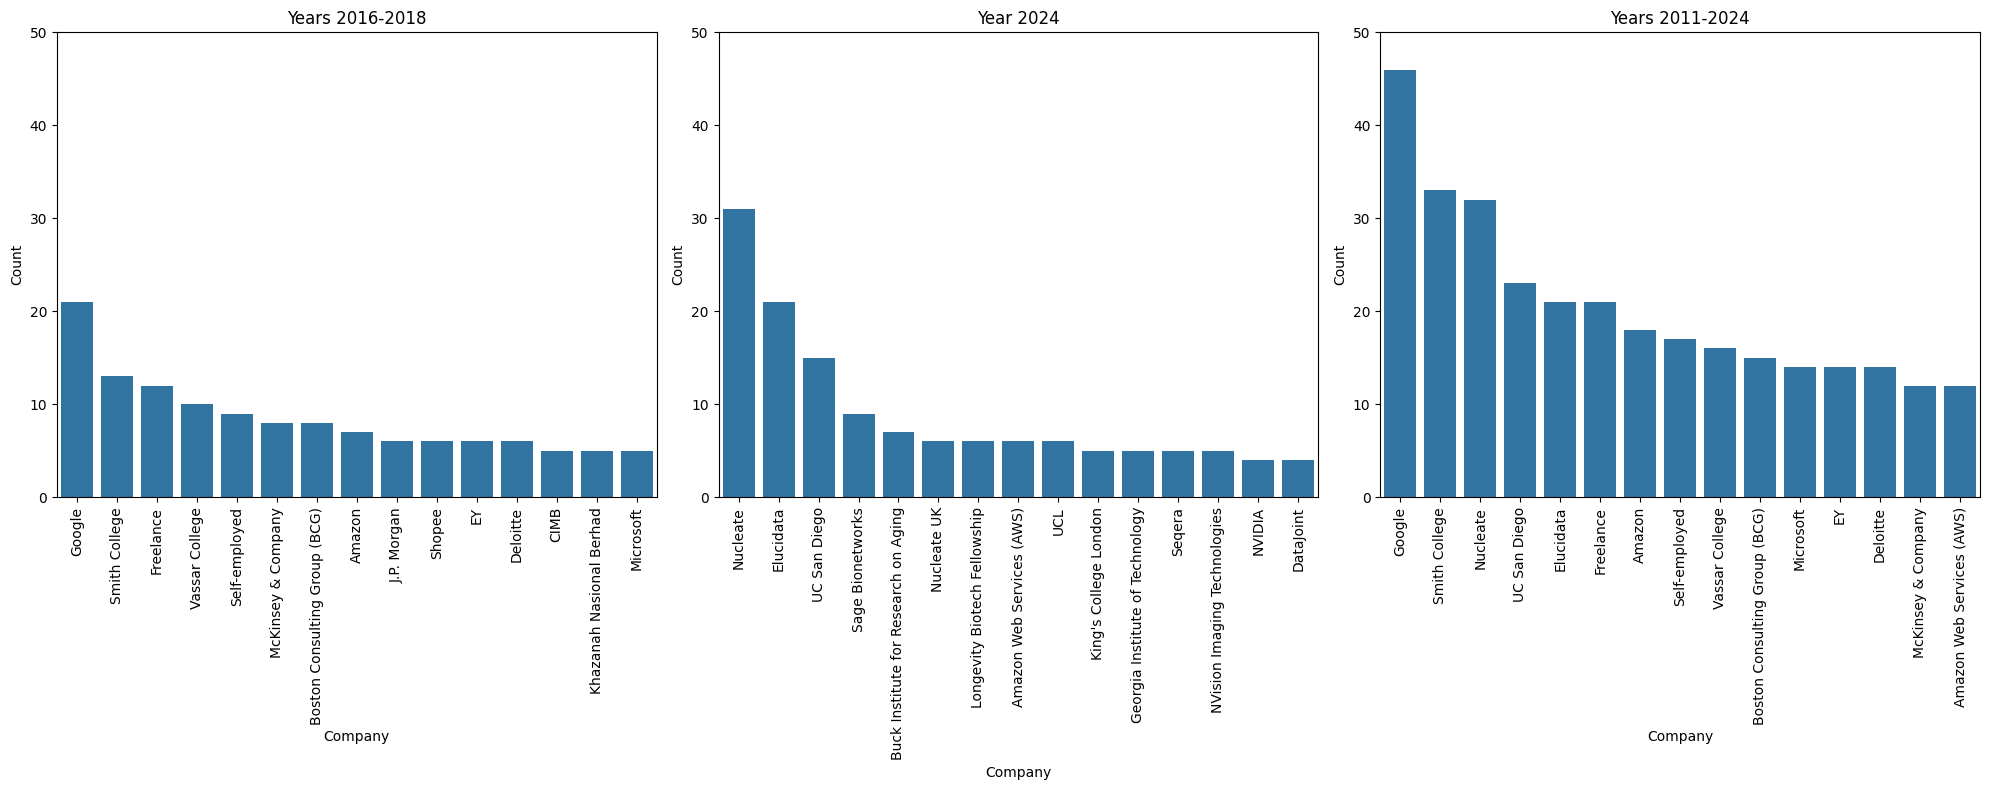

In [281]:
# Filter and get the top 15 positions for each plot
transition1 = df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Company'].value_counts().head(15)
transition2 = df.loc[df['Connected Year'].isin([2023, 2024])]['Company'].value_counts().head(15)
all_years = df['Company'].value_counts().head(15)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1
sns.barplot(x=transition1.index, y=transition1.values, ax=axs[0])
axs[0].set_title('Years 2016-2018')
axs[0].set_xlabel('Company')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim([0, 50])

# Plot 2
sns.barplot(x=transition2.index, y=transition2.values, ax=axs[1])
axs[1].set_title('Year 2024')
axs[1].set_xlabel('Company')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim([0, 50])

# Plot 3
sns.barplot(x=all_years.index, y=all_years.values, ax=axs[2])
axs[2].set_title('Years 2011-2024')
axs[2].set_xlabel('Company')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=90)
axs[2].set_ylim([0, 50])

plt.tight_layout()
plt.show()

### Historical Overlap of Top 20 Companies: 2016-2018 and 2024 vs. All-Time Patterns








In [282]:
companies_2016_2018 = set(df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Company'].value_counts().head(20).index)
companies_2024 = set(df.loc[df['Connected Year'].isin([2023, 2024])]['Company'].value_counts().head(20).index)
all_companies = set(df['Company'].value_counts().head(20).index)

# Find overlapping companies between 2024 and all years
all_years_overlap_with_2024 = all_companies.intersection(companies_2024)
print("Top companies represented in both 2024 and across all years", all_years_overlap_with_2024)

# Find overlapping companies between 2016-2018 and all years
all_years_overlap_with_20161718 = all_companies.intersection(companies_2016_2018)
print("Top companies represented in 2016-2018 and across all years", all_years_overlap_with_20161718)

# Find companies in 2016-2018 but not in all years
unique_2016_2018 = companies_2016_2018.difference(all_companies)
print("Top companies represented only in 2016-2018, but not across all years", unique_2016_2018)

# Find companies in 2024 but not all years
unique_2024 = companies_2024.difference(all_companies)
print("Top companies represented in 2024 but not across all years", unique_2024)

Top companies represented in both 2024 and across all years {'Longevity Biotech Fellowship', 'UC San Diego', 'Amazon Web Services (AWS)', 'Elucidata', 'Sage Bionetworks', 'Nucleate'}
Top companies represented in 2016-2018 and across all years {'Boston Consulting Group (BCG)', 'Vassar College', 'McKinsey & Company', 'Google', 'Smith College', 'Amazon', 'Self-employed', 'Microsoft', 'EY', 'Freelance', 'Deloitte'}
Top companies represented only in 2016-2018, but not across all years {'Asia School of Business', 'Goldman Sachs', 'Citi', 'Bain & Company', 'Khazanah Nasional Berhad', 'J.P. Morgan', 'Grab', 'CIMB', 'Shopee'}
Top companies represented in 2024 but not across all years {"King's College London", 'Buck Institute for Research on Aging', 'National University of Singapore', 'Sama Therapeutics', 'Broad Institute of MIT and Harvard', 'NVision Imaging Technologies', 'NVIDIA', 'Georgia Institute of Technology', 'Seqera', 'Nucleate UK', 'UCL', 'DataJoint', 'University of Oklahoma Health Sc

### Number of connections all-time - count and percentage

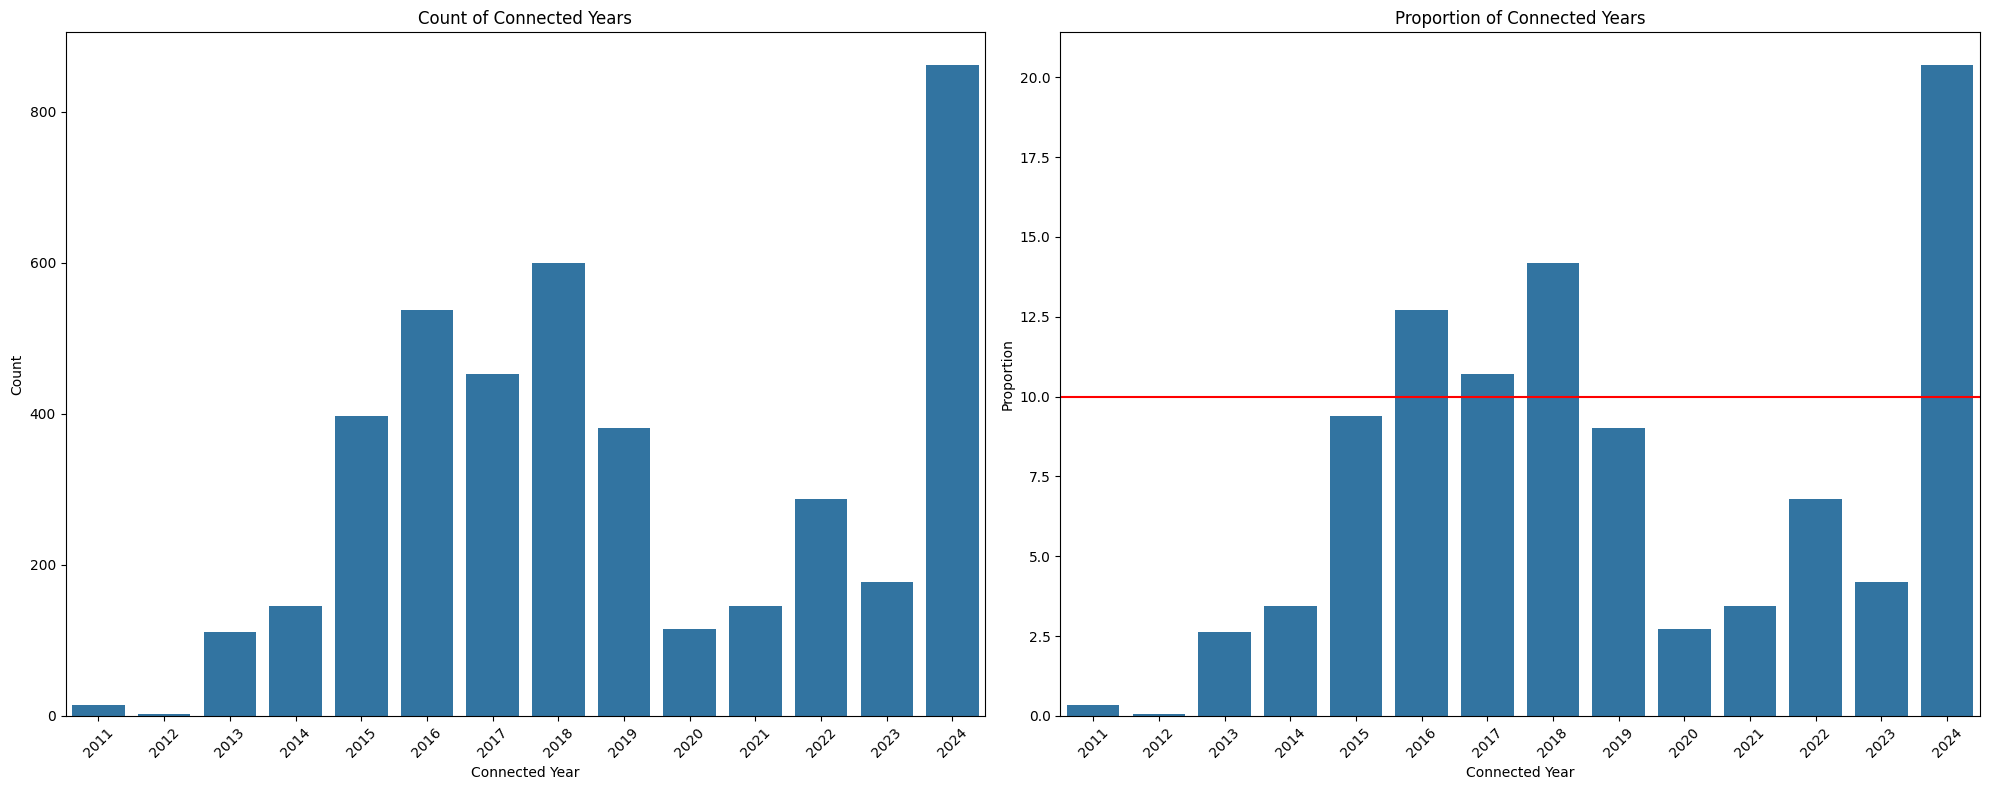

In [283]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Count of 'Connected Year'
sns.countplot(x=df['Connected Year'], ax=axs[0])
axs[0].set_title('Count of Connected Years')
axs[0].set_xlabel('Connected Year')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot 2: Proportion of 'Connected Year'
sns.barplot(x=df['Connected Year'].value_counts().index, 
            y=df['Connected Year'].value_counts().values / df['Connected Year'].value_counts().sum()*100, ax=axs[1])
axs[1].set_title('Proportion of Connected Years')
axs[1].set_xlabel('Connected Year')
axs[1].set_ylabel('Proportion')
axs[1].tick_params(axis='x', rotation=45)
plt.axhline(y = 10, color = 'r', linestyle = '-') 

plt.tight_layout()
plt.show()


### Number of Connections made by month across Years 2017, 2018 and Year 2024 

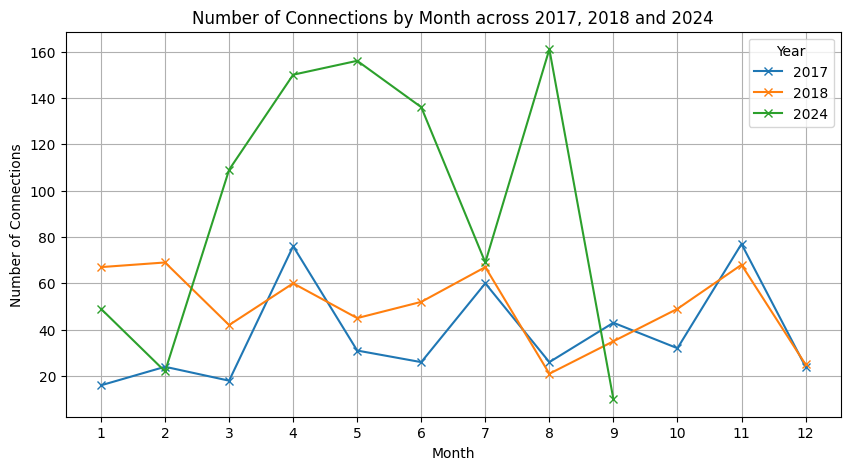

In [284]:
df['Connected Month'] =  pd.to_datetime(df['Connected On']).dt.month
# Plotting
plt.figure(figsize=(10, 5))

for year in [2017, 2018, 2024]:
    yearly_data = df[df['Connected Year'] == year]
    month_counts = yearly_data['Connected Month'].value_counts().sort_index()  # Ensure months are sorted
    plt.plot(month_counts.index, month_counts.values, marker='x', label=str(year))

plt.title('Number of Connections by Month across 2017, 2018 and 2024')
plt.xlabel('Month')
plt.ylabel('Number of Connections')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months 1-12
plt.legend(title='Year')
plt.grid(True)
plt.show()

### Word Cloud of Job Title of Connections

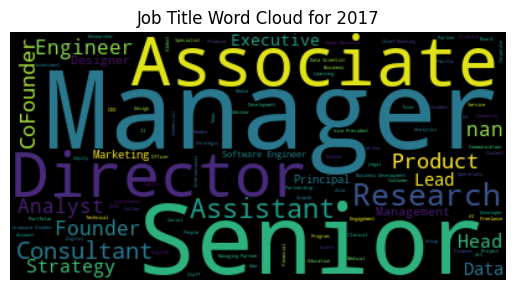

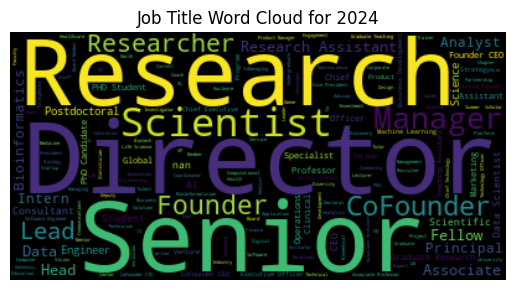

In [285]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for year in [2017, 2024]:
    # Filter the DataFrame for the current year in the loop
    yearly_data = df[df['Connected Year'] == year]
    
    # Assuming 'Position' is the column containing the text data
    text = " ".join(yearly_data['Position'].astype(str))
    
    # Remove all numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    
    # Create and generate a word cloud image
    wordcloud = WordCloud().generate(text)
    
    # Display the generated image with the year as the title
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Job Title Word Cloud for {year}")
    plt.axis("off")  # Turn off the axis
    plt.show()  # Display the word cloud image


### Job title of connections made in July and August 2024

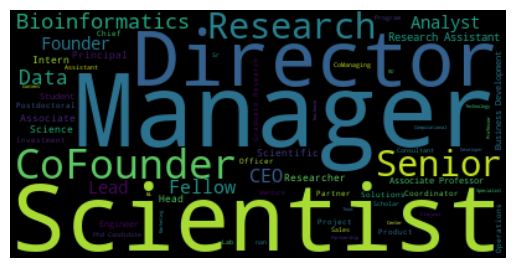

In [286]:
# get data for the year 2024 and month 8
yearly_data = df[(df['Connected Year'] == 2024) & (df['Connected Month'].isin([7, 8]))]

text = " ".join(yearly_data['Position'].astype(str))

# Remove all numbers and punctuation
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
text = re.sub(r'\d+', '', text)      # Remove numbers

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

fig = plt.gcf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off the axis
plt.show()  # Display the word cloud image
#fig.savefig('wc_august2024.pdf')

# Job title clustering using TF-IDF vs. SentenceTransformers

#### TF-IDF
- Convert the text into a sparse matrix of token counts using weighted token counts
- Create fixed size vocab based on corpus
- Each word is treated independently of others, features are based on frequency of terms
- Used for document classification, key word extraction
- Each dimension corresponds to a unique word (or n-gram) in your dataset.
- The values in the matrix represent word frequency (in the case of CountVectorizer) or TF-IDF scores (in the case of TfidfVectorizer).
- vectors represent the presence/ frequency of specific words in each job title
- does not account for semantic similarity between words (e.g., "developer" and "programmer" would be considered entirely different).

In [287]:
vectorizer = TfidfVectorizer() # matrix of TF-IDF features.
nltk.download('stopwords') # this includes 'of', 'in', 'a'
df.loc[:, 'Position'] = df['Position'].fillna('') # fill any blank/NA job titles with empty string 

def preprocess_text(text):
    text =  re.sub(r'\d+', '', text)   # replace digits with empty sr
    text = re.sub(r'[^\w\s]', ' ', text).lower() # replace punctuation with space and lowercase all text
    stop_words = set(stopwords.words('english')) # remove stop wrods
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_job_titles'] = df['Position'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [288]:
X = vectorizer.fit_transform(df['cleaned_job_titles'])  # # Fit and transform the cleaned job titles
range_n_clusters = list(range(2, 20))
best_n_clusters = 2
best_silhouette_score = -1 # Determine the optimal number of clusters using the silhouette score

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels) # this score 
    if silhouette_avg > best_silhouette_score: # the higher the silhouette avg, the better 
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg

# Fit the best KMeans model
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
print(best_n_clusters)

19


#### Silhouette Score
- metric used to calculate the goodness of a clustering technique
- it measures within-cluster similarity and out-of-cluster discrimination.
- a score of more than 0.5 indicates a high-quality cluster, but that threshold changes depending on the dataset
- may not perform well if the data clusters have irregular shapes or are of varying sizes

In [289]:
print(best_silhouette_score)

0.08879187961468031


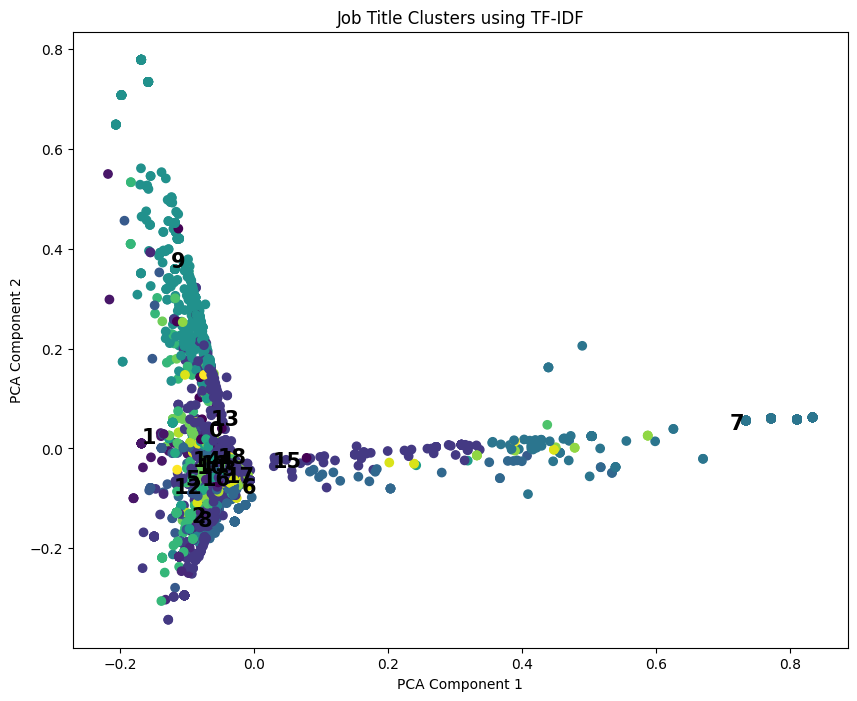

In [290]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Job Title Clusters using TF-IDF')
# Add legend to show cluster labels

# Calculate and plot cluster centroids
unique_clusters = np.unique(df['cluster'])
for cluster in unique_clusters:
    # Get all points in the current cluster
    points_in_cluster = X_reduced[df['cluster'] == cluster]
    # Calculate the centroid
    centroid = points_in_cluster.mean(axis=0)
    # Annotate the cluster number at the centroid
    plt.text(centroid[0], centroid[1], str(cluster), fontsize=15, fontweight='bold', ha='center', va='center')

plt.show()

### Word Cloud for each cluster produced using TF-IDF

### Insights 
- Cluster 3 seems to correspond to outliers as well - the fact that there are 2000 connections in this cluster doesn't make it very meaningful at all
- but we can infer that "head",  "lead", "senior", and "engineer" are common words in job titles
- 

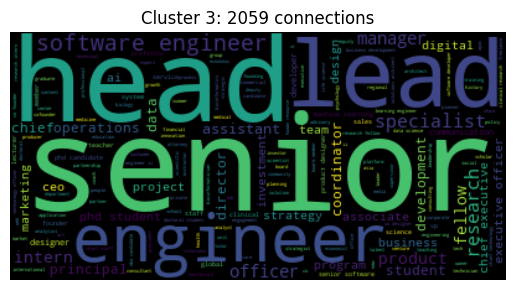

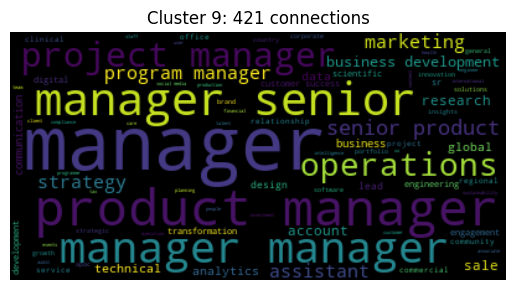

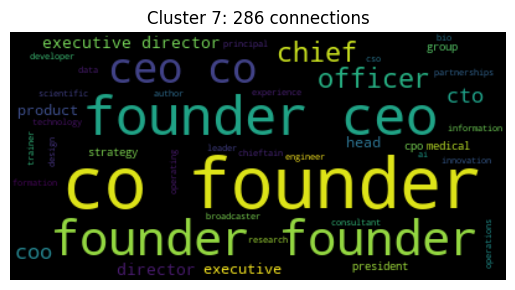

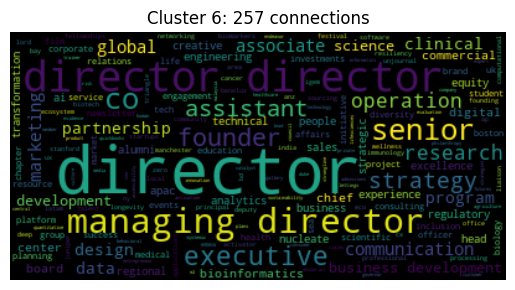

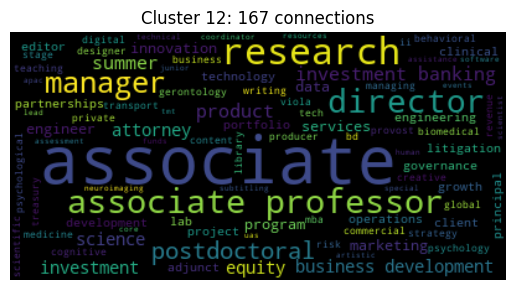

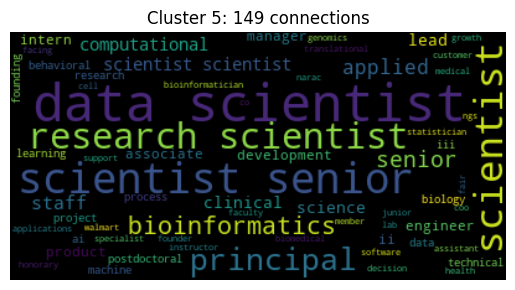

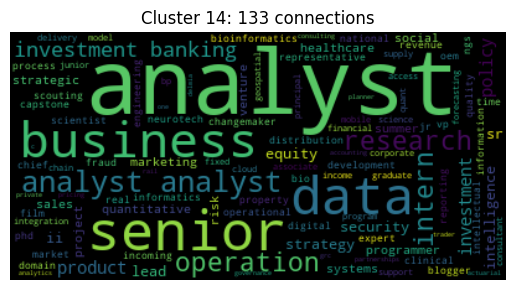

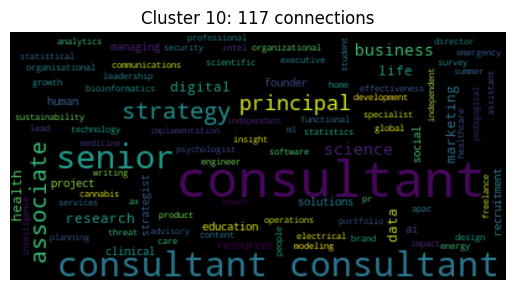

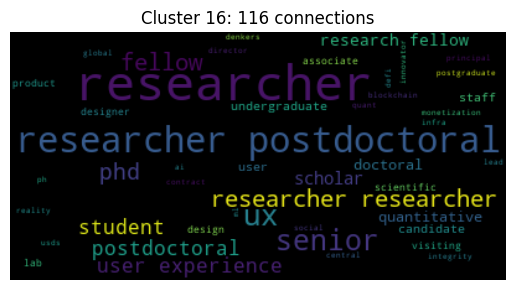

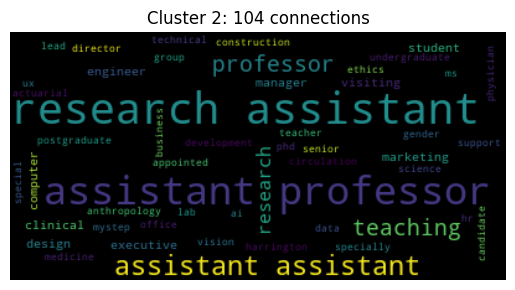

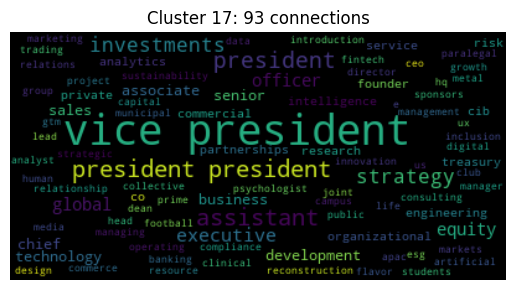

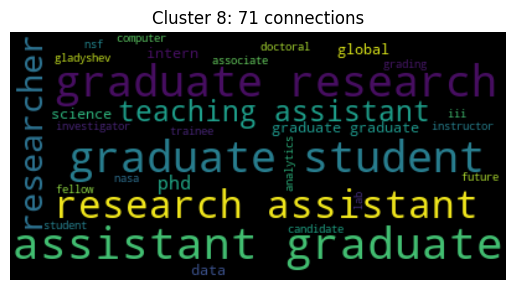

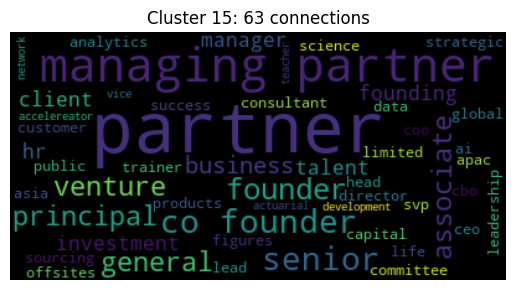

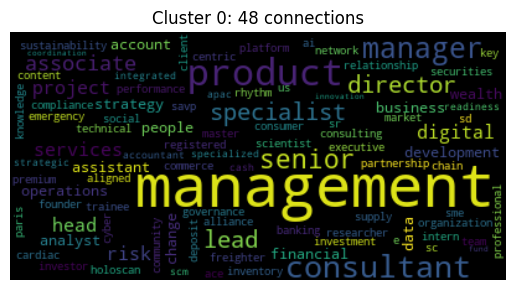

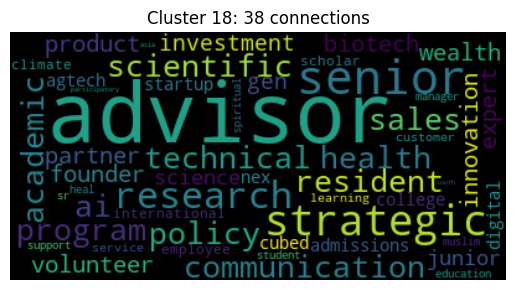

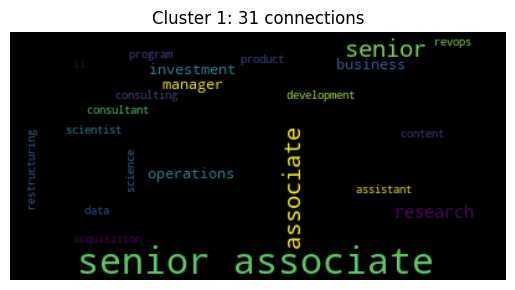

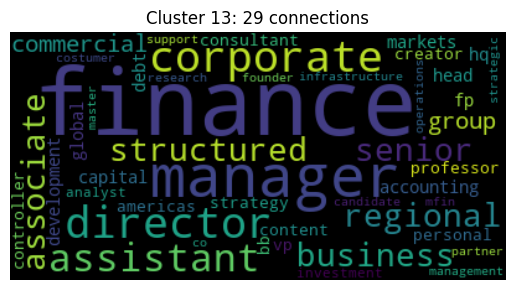

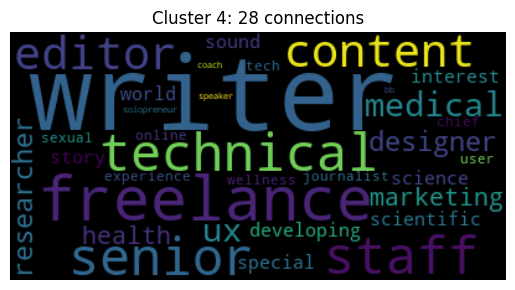

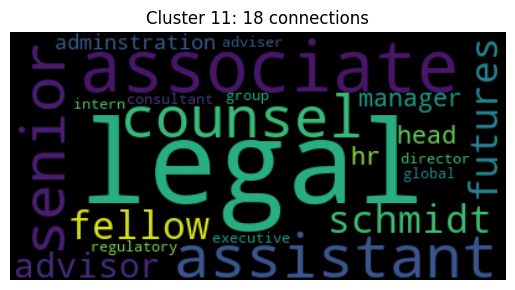

In [291]:
cluster_count = df['cluster'].value_counts()
for c in cluster_count.index:
    # Filter the DataFrame for the current year in the loop
    temp = df[df['cluster'] == c]
    
    # Assuming 'Position' is the column containing the text data
    text = " ".join(temp['cleaned_job_titles'].astype(str))
    
    # Remove all numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    
    # Create and generate a word cloud image
    wordcloud = WordCloud().generate(text)
    count = cluster_count[c]
    # Display the generated image with the year as the title
    fig = plt.gcf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {c}: {count} connections")
    plt.axis("off")  # Turn off the axis
    #plt.show()  # Display the word cloud image
    plt.savefig(f'figures/nltk_clusters_{c}.png')
    plt.show()  # Display the word cloud image

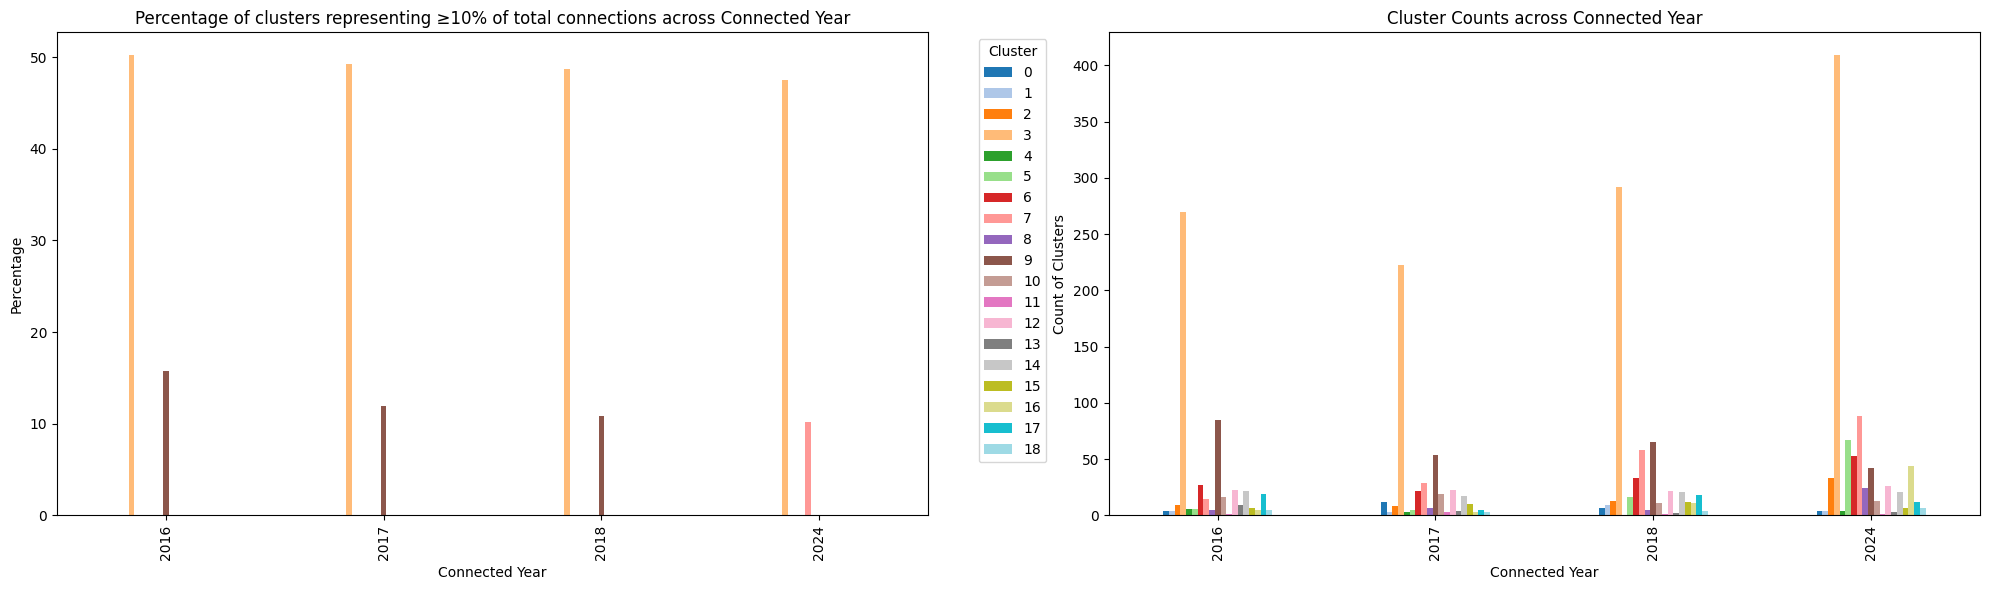

In [292]:
grouped = df.groupby("Connected Year")['cluster'].value_counts().unstack(fill_value=0)
filter_grouped =  grouped.loc[grouped.index.isin([2016, 2017, 2018, 2024])]
# Plot a stacked bar plot or a grouped bar plot
percentage_grouped  = filter_grouped.div(grouped.sum(axis=1), axis=0).round(4)*100
percentage_grouped =  percentage_grouped.loc[grouped.index.isin([2016, 2017, 2018, 2024])]
# Set up the figure and axes for two side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot the first chart: percentage grouped bar plot
colors = plt.get_cmap('tab20', percentage_grouped.shape[1])
percentage_grouped[percentage_grouped > 10].plot(kind='bar', stacked=False, ax=axes[0], color=[colors(i) for i in range(percentage_grouped.shape[1])])
axes[0].set_title("Percentage of clusters representing ≥10% of total connections across Connected Year")
axes[0].set_xlabel("Connected Year")
axes[0].set_ylabel("Percentage")
axes[0].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')


# Plot the second chart: filtered grouped bar plot
colors = plt.get_cmap('tab20', filter_grouped.shape[1])
filter_grouped.plot(kind='bar', stacked=False, ax=axes[1], color=[colors(i) for i in range(filter_grouped.shape[1])])
axes[1].set_title("Cluster Counts across Connected Year")
axes[1].set_xlabel("Connected Year")
axes[1].set_ylabel("Count of Clusters")
axes[1].legend().set_visible(False)  # Hide the legend for the second plot

# Adjust layout for better readability
plt.tight_layout()
# Show the plot
plt.show()

#### Pre-trained BERT (SentenceTransformers)
- Can leverage contextual understanding
- sentence_transformer instead produces dense, lower-dim vectors that encode semantic information and relationships between the sentences.
- SentenceTransformer produces embeddings that capture semantic similarity. For example, developer and programmer will have closer embeddings.
- The model I used here maps sentences and paragraphs (in this case 7 job titles) to a 768 dimensional vector space.
-  Semantically similar job titles are more likely to be positioned closer, and this might produce more clusters; nuanced distinctions between jobs can be captured. 

In [293]:
model = SentenceTransformer('paraphrase-distilroberta-base-v2')
# https://huggingface.co/sentence-transformers/paraphrase-distilroberta-base-v2
# https://medium.com/@abhishekranjandev/building-a-semantic-search-engine-with-machine-learning-and-jupyter-notebooks-fbcb15b538c5

X = model.encode(df['cleaned_job_titles'].tolist()) # pre-trained Sentence-BERT model to generate document embeddings

C:\Users\LENOVO\miniconda3\envs\linkedin\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [294]:
range_n_clusters = list(range(2, 20)) # maximum of 20 clusters
best_n_clusters = 2
best_silhouette_score = -1 # Determine the optimal number of clusters using the silhouette score

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg

# Fit the best KMeans model
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
print(best_n_clusters)

15


### K-means as choice of clustering algorithm 
- K-means assumes that the clusters are of similar size and shape (spherical), but might not be the most suitable for high dimensional space emebeddings like SentenceTransformer.
- However, for simplicity sake I decided to stick with k-means since I had already implemented it for the instance above where I used NLTK.
- I had experimented with using HDBSCAN since I expect some outlier job titles (e.g., "Chief Comedian Officer")  but it resulted in too many clusters (i.e., 80+) and there were too many outliers

In [295]:
print(best_silhouette_score) # this score is better than the one produced from the TD-IDF vector 

0.11394789


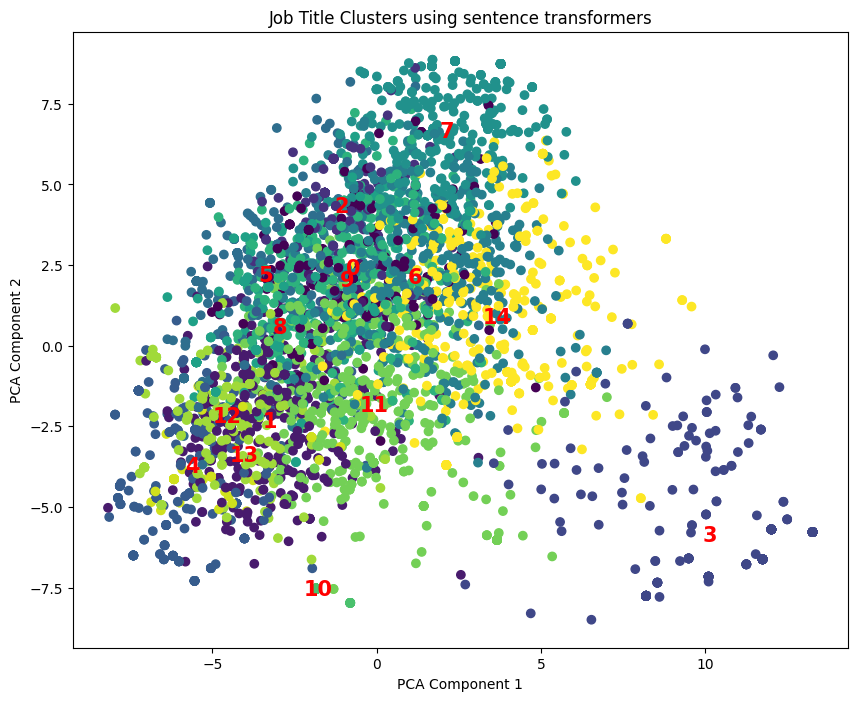

In [296]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Job Title Clusters using sentence transformers')
# Add legend to show cluster labels
# Calculate and plot cluster centroids
unique_clusters = np.unique(df['cluster'])
for cluster in unique_clusters:
    # Get all points in the current cluster
    points_in_cluster = X_reduced[df['cluster'] == cluster]
    # Calculate the centroid
    centroid = points_in_cluster.mean(axis=0)
    # Annotate the cluster number at the centroid
    plt.text(centroid[0], centroid[1], str(cluster), fontsize=15, fontweight='bold', ha='center', va='center', color='red')

plt.show()

In [297]:
cluster_count = df['cluster'].value_counts()

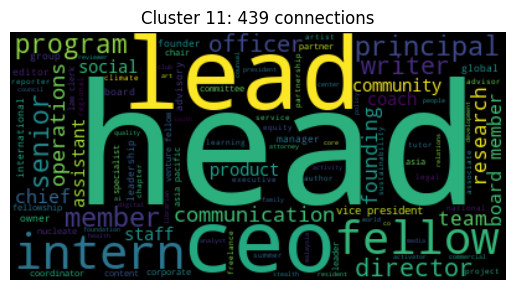

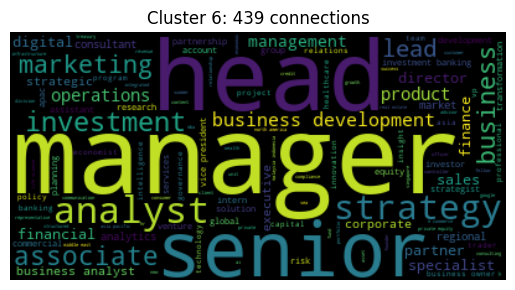

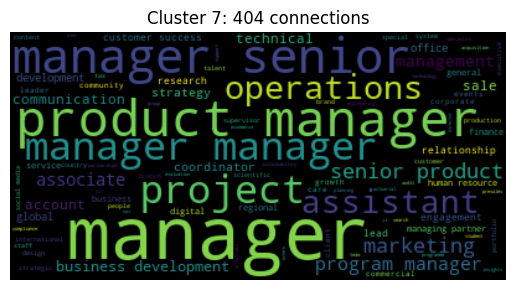

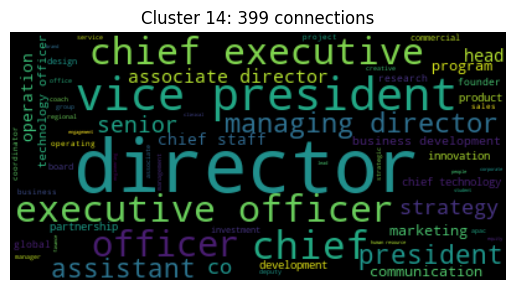

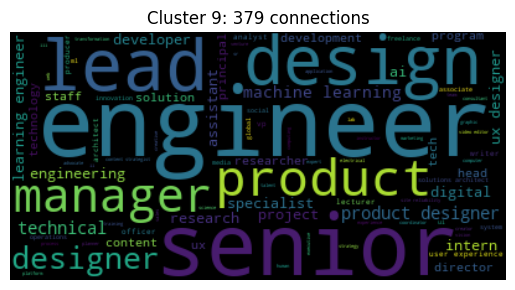

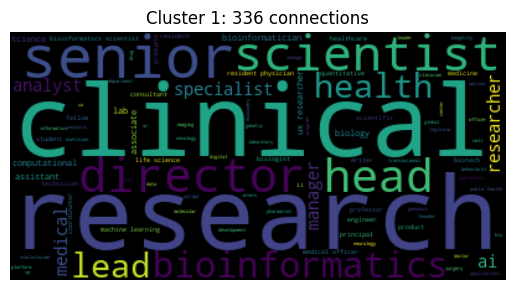

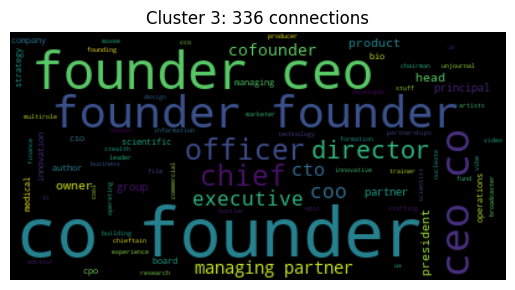

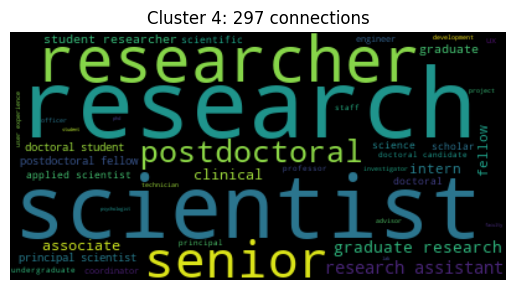

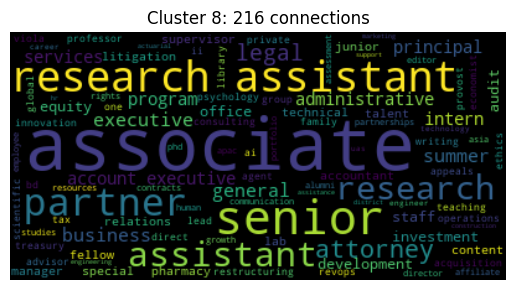

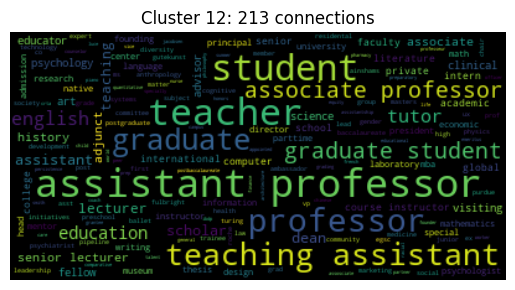

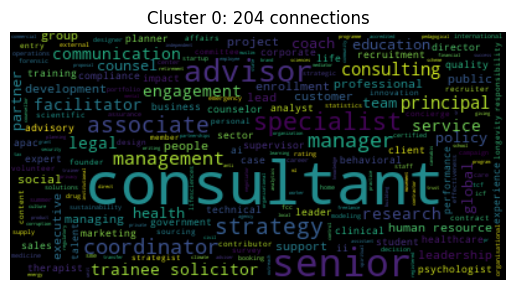

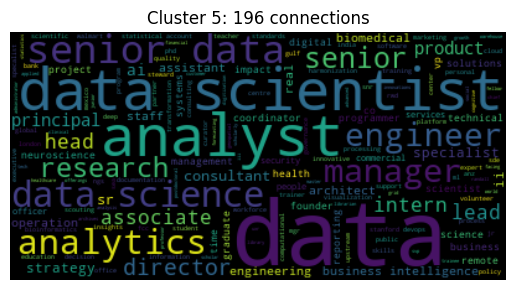

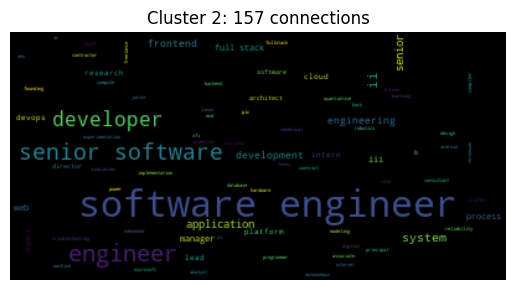

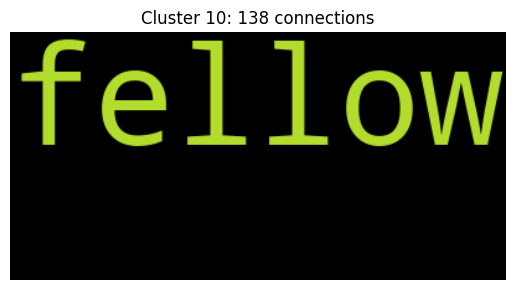

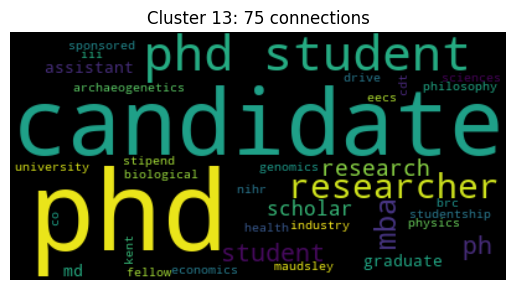

In [302]:
cluster_count = df['cluster'].value_counts()
for c in cluster_count.index:
    # Filter the DataFrame for the current year in the loop
    temp = df[df['cluster'] == c]
    
    # Assuming 'Position' is the column containing the text data
    text = " ".join(temp['cleaned_job_titles'].astype(str))
    
    # Remove all numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    # Create and generate a word cloud image
    wordcloud = WordCloud().generate(text)
    count = cluster_count[c]
    # Display the generated image with the year as the title
    fig = plt.gcf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {c}: {count} connections")
    plt.axis("off")  # Turn off the axis
    plt.savefig(f'figures/bert_clusters_{c}.png')
    plt.show()  # Display the word cloud image
    

### Insights
- Clusters 6,7, 11 are the most represented in years 2016-2018, but in 2018 cluster 3 is an emerging cluster with increasing representation. 
- In 2024 cluster 1, 3 and 4 have the largest share of representation among connections. 
- Cluster 11 doesn't seem particularly meaningful since the titles "head", "lead", "ceo" and "intern" are represneted that cluster. It seems to be an 'outlier' cluster 
- Cluster 6 corresponds to titles in corporate jobs (e.g., manager, head, senior, associate, investment, strategy, business)
- Cluster 7 corresponds to titles in corporate jobs as we ll, but are more "managerial", i.e., middle manager type jobs and related to product 

- Cluster 1 corrsponds to job titles in healthcare and research in industry (e.g., clinical, research, scientist, senior, bioinformatics)
- Cluster 3 corresponds to entrepreneurs (e.g., founder, CEO)
- Cluster 4 corresponds to scientists and researchers in academia (e.g., postdocotral, graduate research, doctral student). 

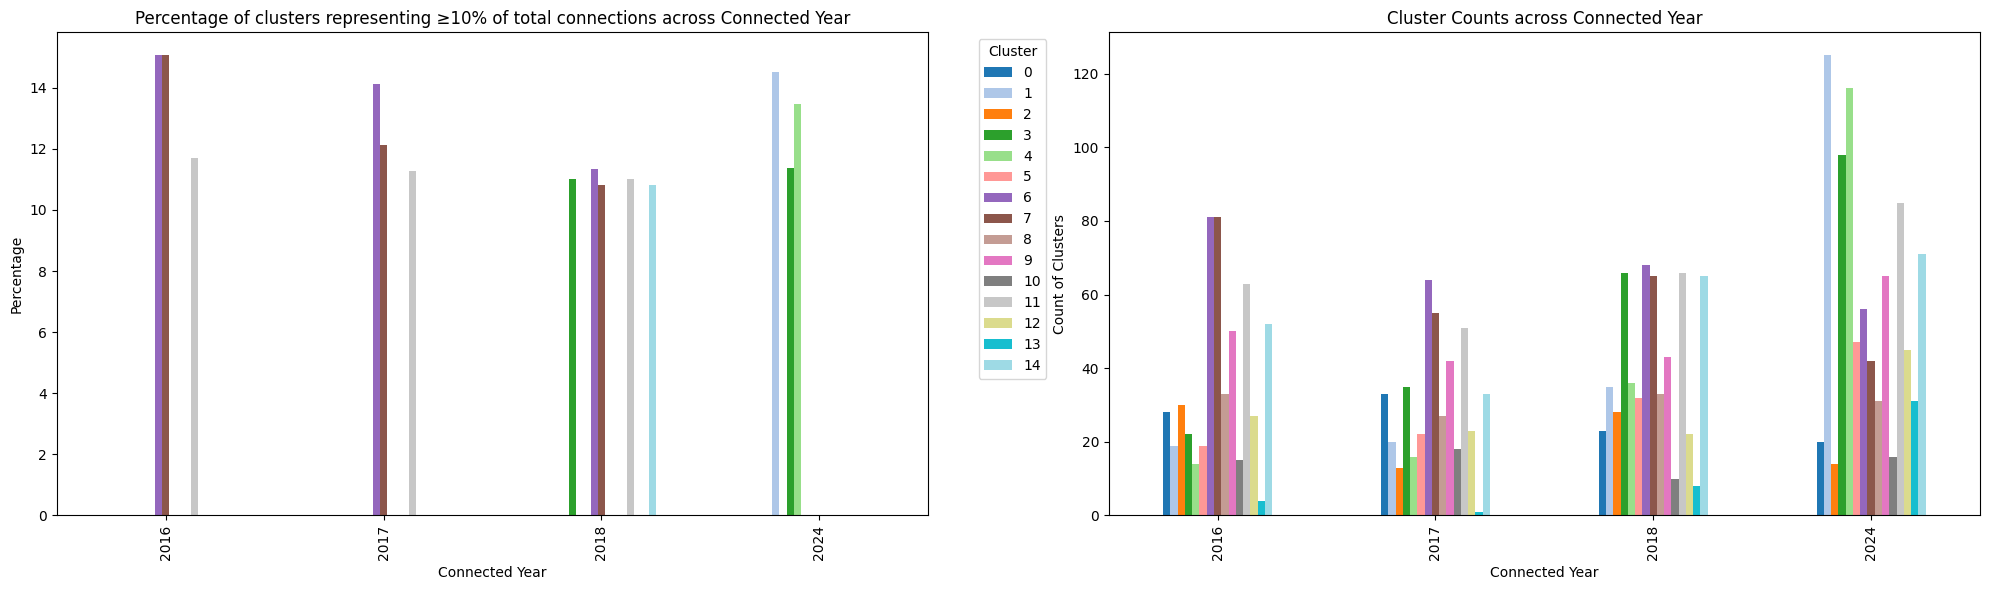

In [300]:
grouped = df.groupby("Connected Year")['cluster'].value_counts().unstack(fill_value=0)
filter_grouped =  grouped.loc[grouped.index.isin([2016, 2017, 2018, 2024])]
# Plot a stacked bar plot or a grouped bar plot
percentage_grouped  = filter_grouped.div(grouped.sum(axis=1), axis=0).round(4)*100
percentage_grouped =  percentage_grouped.loc[grouped.index.isin([2016, 2017, 2018, 2024])]
# Set up the figure and axes for two side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot the first chart: percentage grouped bar plot
colors = plt.get_cmap('tab20', percentage_grouped.shape[1])
percentage_grouped[percentage_grouped > 10].plot(kind='bar', stacked=False, ax=axes[0], color=[colors(i) for i in range(percentage_grouped.shape[1])])
axes[0].set_title("Percentage of clusters representing ≥10% of total connections across Connected Year")
axes[0].set_xlabel("Connected Year")
axes[0].set_ylabel("Percentage")
axes[0].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')


# Plot the second chart: filtered grouped bar plot
colors = plt.get_cmap('tab20', filter_grouped.shape[1])
filter_grouped.plot(kind='bar', stacked=False, ax=axes[1], color=[colors(i) for i in range(filter_grouped.shape[1])])
axes[1].set_title("Cluster Counts across Connected Year")
axes[1].set_xlabel("Connected Year")
axes[1].set_ylabel("Count of Clusters")
axes[1].legend().set_visible(False)  # Hide the legend for the second plot

# Adjust layout for better readability
plt.tight_layout()
# Show the plot 
plt.show()
